<a href="https://colab.research.google.com/github/embr-boyc/Astro-Data/blob/main/Hubble_constant_using_Type_1a_Supernovae.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # Importing all necessary packages
import matplotlib.pyplot as plt
import astropy.io.ascii
import astropy.units as u
import astropy.constants as ac

In [ ]:
from google.colab import files # Importing data file
uploaded = files.upload()

Saving Tonry_2003.vot to Tonry_2003.vot


In [ ]:
dat = astropy.io.ascii.read("Tonry_2003.vot")

/usr/local/lib/python3.10/dist-packages/astropy/io/ascii/html.py:91: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  soup = BeautifulSoup("\n".join(lines))


Text(0, 0.5, 'Velocity [km/s]')

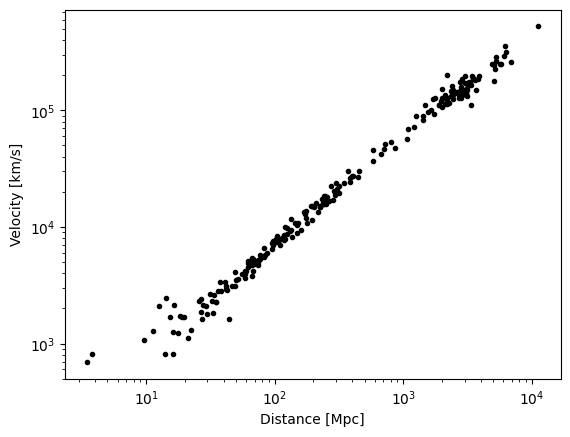

In [ ]:
distance = 10**dat["col8"] / 72.0 * u.mpc # Referencing column 8 of the data table
distance_error = (10**(dat["col8"]+dat["col9"]) - 10**dat["col8"]) / 72.0 * u.mpc
velocity = 10**dat["col7"] * u.km / u.s # Referencing column 7 of the data table
plt.plot(distance.to(u.mpc).value, velocity.to(u.km / u.s).value, marker=".", color="black", linestyle="none") # Plotting the data points
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Distance [Mpc]") # Labeling the x-axis
plt.ylabel("Velocity [km/s]") # Labeling the y-axis

In [ ]:
x = distance.to(u.mpc).value # Storing value into x
ind = np.where((x > 0) & (x < 700)) # Changing the window of the graph
z = np.polyfit(distance.to(u.mpc).value[ind], velocity.to(u.km / u.s).value[ind], 1) # New graph window

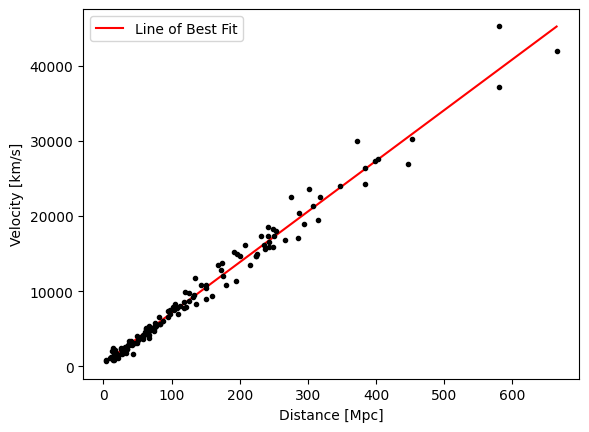

In [ ]:
y = velocity.to(u.km / u.s).value[ind] # Referencing new y-axis window of the data
x = distance.to(u.mpc).value[ind] # Referencing new x-axis window of the data
velocity_error = dat["col7"] * u.km / u.s
yerr = velocity_error.to(u.km / u.s).value[ind]

z = np.polyfit(x, y, 1) # Slope
fit_fn = np.poly1d(z) # Fitting the slope into the data
x_fit = np.linspace(np.min(x), np.max(x), 100) # Calculating line of best fit based off the x-axis points
y_fit = fit_fn(x_fit) # Finishing the line of best fit calculation by refrencing the y-axis based off the x-axis

plt.errorbar(x, y, yerr=yerr, marker=".", color="black", linestyle="none") # Plotting the data
plt.plot(x_fit, y_fit, color="red", label="Line of Best Fit") # plotting the line of best fit

plt.xlabel("Distance [Mpc]") # Labeling the y-axis
plt.ylabel("Velocity [km/s]") # Labeling the x-axis
plt.legend()
plt.show()

In [ ]:
slope = z[0] # Calculating slope
print("Slope:", slope)
H0 = slope # Calculating Hubble constant
print("Hubble Constant:", H0 * u.km / u.s / u.Mpc)

Slope: 67.48137250840927
Hubble Constant: 67.48137250840927 km / (Mpc s)


In [ ]:
Mpc_in_km = 3.086e22 # Megaparsec in kilometers
seconds_in_year = 3.154e7 # Seconds in a year

H0_per_s = H0 / Mpc_in_km # Calculating Hubble constant to 1/s
age_in_seconds = 1 / H0_per_s # Calculating age in seconds
age_in_years = age_in_seconds / seconds_in_year # Calculating age in years
print ("The universe is", age_in_years, "years old.")

The universe is 14499409833016.062 years old.
